In [1]:
# CNN 문제점 : 사실상 모든 딥러닝의 문제점... 과적합
# 1. 데이터가 적어서 과소적합
# 2. 과도한 학습으로 인해 train 에 만 적중률이 높은 과대 적합
# 3. 해결.. 규제    /    데이터 증대

In [2]:
# 딥러닝에서는 주어진 데이터를 인위적으로 늘리는 데이터 증대하는 data agumentation을 적용
# 영상을 이동, 회전 또는 좌우 반전
# 명암조정
# --> 텐서플로가 제공... 함수를

In [3]:
#영상 증대시키고 확인하기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
class_name = [
'airplane'		,	
'automobile'	,									
'bird'				,						
'cat'					,					
'deer'				,						
'dog'					,					
'frog'				,						
'horse'				,						
'ship'				,						
'truck'
]
class_name

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
(x_train,y_train),(x_target,y_target) =  cifar10.load_data()
x_train = x_train / 255.0; x_target = x_target / 255.0

170508288/170498071 [==============================] - 6s 0us/step


In [6]:
# 앞에 12개만 데이터 증폭
x_train = x_train[:12]; y_train = y_train[:12]

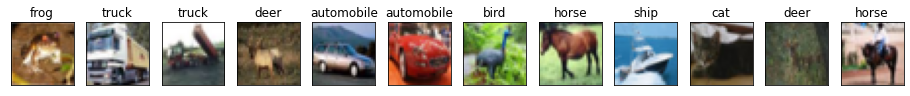

In [7]:
# 앞 12개 영상 출력
plt.figure(figsize=(16,2))
for i in range(12):
  plt.subplot(1,12,i+1)
  plt.imshow(x_train[i])
  plt.xticks([]); plt.yticks([])
  plt.title(class_name[int(y_train[i])])

In [8]:
batch_size = 6
generator = ImageDataGenerator(rotation_range=30.0, width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
gen = generator.flow(x_train,y_train,batch_size=batch_size)

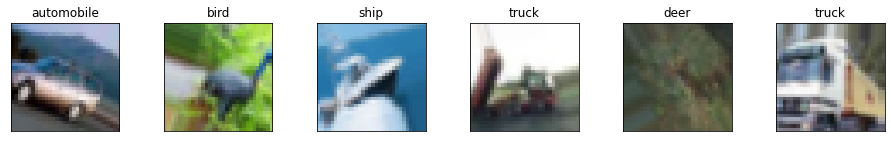

In [9]:
# 첫번째 증대하고 그리기
img,label =  gen.next()
plt.figure(figsize = (16,2))
for i in range(batch_size):
  plt.subplot(1,batch_size, i+1)
  plt.imshow(img[i])
  plt.xticks([]); plt.yticks([])
  plt.title(class_name[int(label[i])])

In [10]:
# 데이터를 증개 시켜서 이미지를 학습
import tensorflow as tf
(x_train,y_train),(x_target, y_target) =  cifar10.load_data()
x_train = x_train/255.0 ; x_target = x_target / 255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_target = tf.keras.utils.to_categorical(y_target,10)

In [11]:
cnn =  tf.keras.models.load_model('mycnn.h5')

In [12]:
cnn.layers

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

newCnn = Sequential()

In [14]:
for layer in cnn.layers:
  newCnn.add(layer)

In [15]:
newCnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [17]:
newCnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
batch_size = 128
generator = ImageDataGenerator(rotation_range=30.0, width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
newCnn.fit_generator( generator.flow(x_train,y_train,batch_size=batch_size), 
                     epochs=50, validation_data=(x_target,y_target),verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
391/391 - 42s - loss: 1.2259 - accuracy: 0.5790 - val_loss: 0.8502 - val_accuracy: 0.7041 - 42s/epoch - 107ms/step
Epoch 2/50
391/391 - 32s - loss: 1.1138 - accuracy: 0.6108 - val_loss: 0.8706 - val_accuracy: 0.6946 - 32s/epoch - 83ms/step
Epoch 3/50
391/391 - 38s - loss: 1.0814 - accuracy: 0.6210 - val_loss: 0.8477 - val_accuracy: 0.7058 - 38s/epoch - 96ms/step
Epoch 4/50
391/391 - 33s - loss: 1.0469 - accuracy: 0.6314 - val_loss: 0.8407 - val_accuracy: 0.7083 - 33s/epoch - 84ms/step
Epoch 5/50
391/391 - 32s - loss: 1.0255 - accuracy: 0.6414 - val_loss: 0.7564 - val_accuracy: 0.7396 - 32s/epoch - 81ms/step
Epoch 6/50
391/391 - 31s - loss: 1.0050 - accuracy: 0.6497 - val_loss: 0.7509 - val_accuracy: 0.7399 - 31s/epoch - 80ms/step
Epoch 7/50
391/391 - 33s - loss: 0.9928 - accuracy: 0.6548 - val_loss: 0.8494 - val_accuracy: 0.7041 - 33s/epoch - 85ms/step
Epoch 8/50
391/391 - 32s - loss: 0.9773 - accuracy: 0.6587 - val_loss: 0.7899 - val_accuracy: 0.7238 - 32s/epoch - 83ms/step

In [18]:
newCnn.save("newMyCnn.h5")
res =  newCnn.evaluate(x_target,y_target)
res[1]*100

313/313 [==============================] - 2s 6ms/step - loss: 0.7063 - accuracy: 0.7642


76.419997215271